#### Bank_Marketing_DataSet

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_data = pd.read_csv('bank.csv')

In [3]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
bank_data.shape

(4521, 17)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# shows the statistical summary of numerical columns
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


##### CATEGORICAL VALUES

In [9]:
cat = bank_data.select_dtypes(include= object)

cat_columns = cat.columns

cat_features = list(cat_columns) 

print(cat_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [10]:
for feature in cat_features:
    
    print('The feature is {} and number of categories are {}'.format(feature,len(bank_data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


The Count Plot Of Each Catagorical Feature

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64




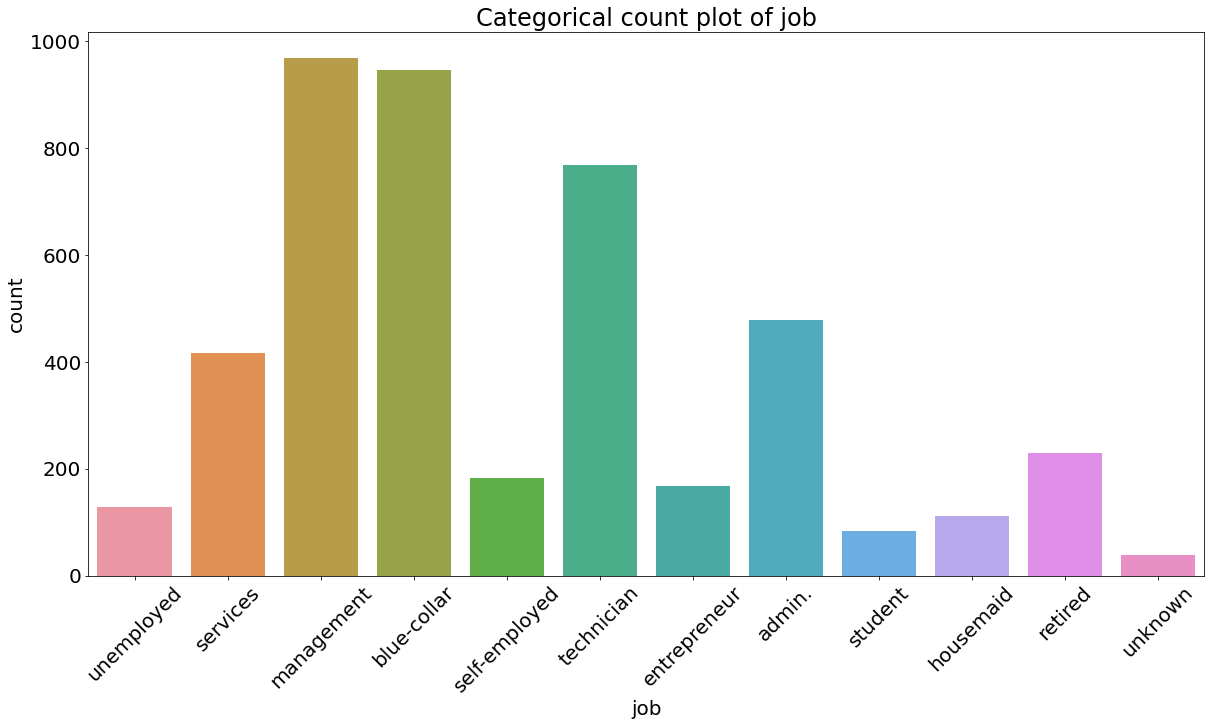

_______________________________
 ________________________________
married     2797
single      1196
divorced     528
Name: marital, dtype: int64




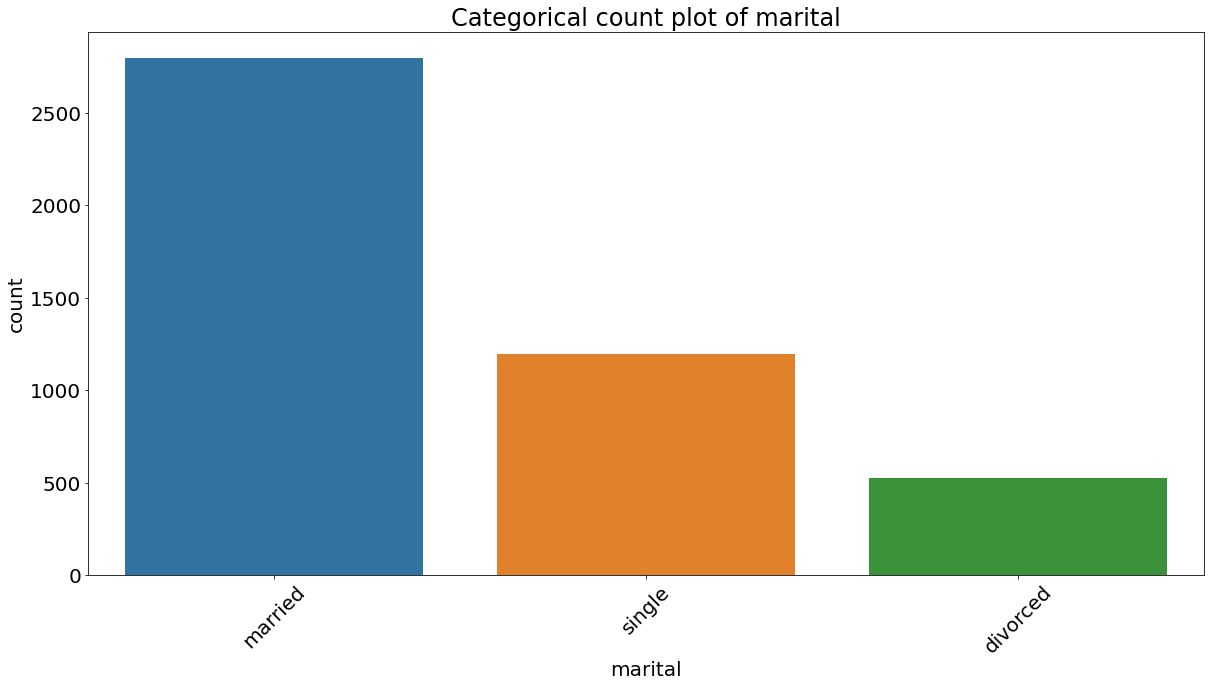

_______________________________
 ________________________________
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64




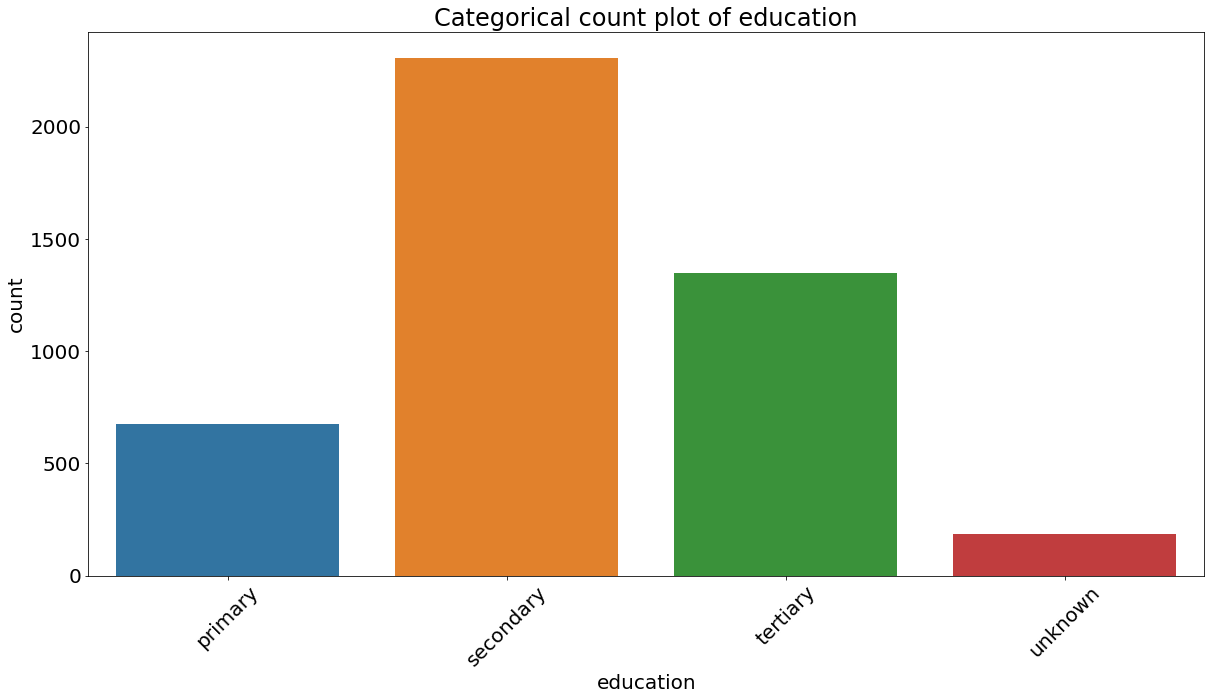

_______________________________
 ________________________________
no     4445
yes      76
Name: default, dtype: int64




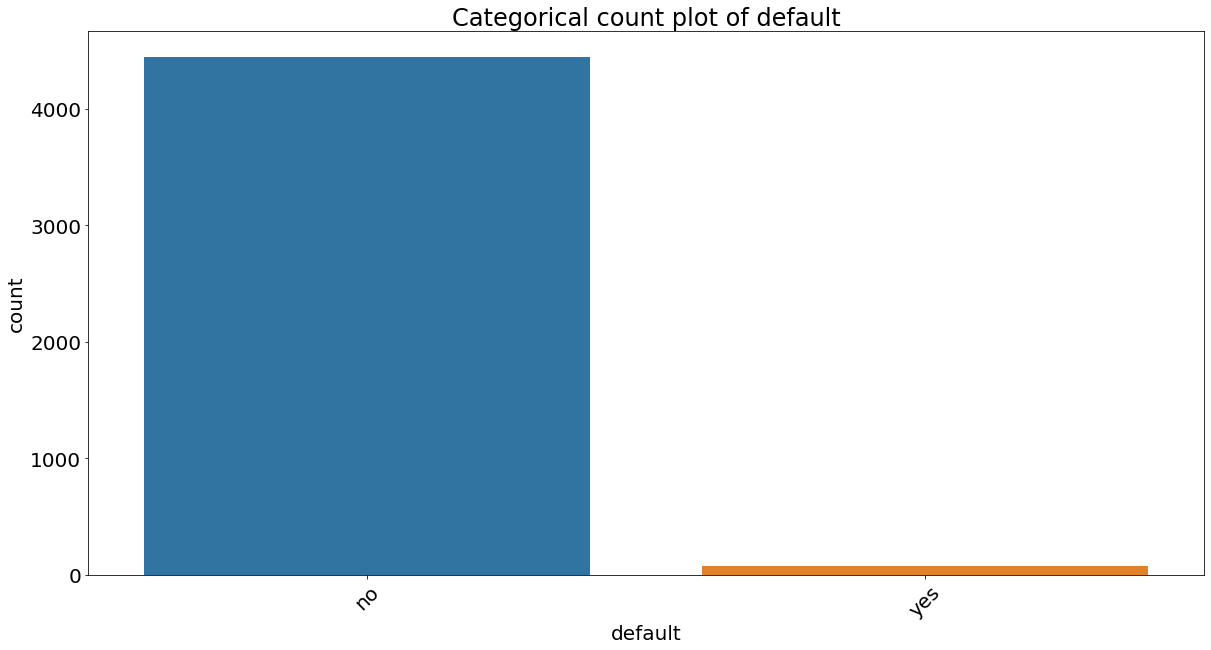

_______________________________
 ________________________________
yes    2559
no     1962
Name: housing, dtype: int64




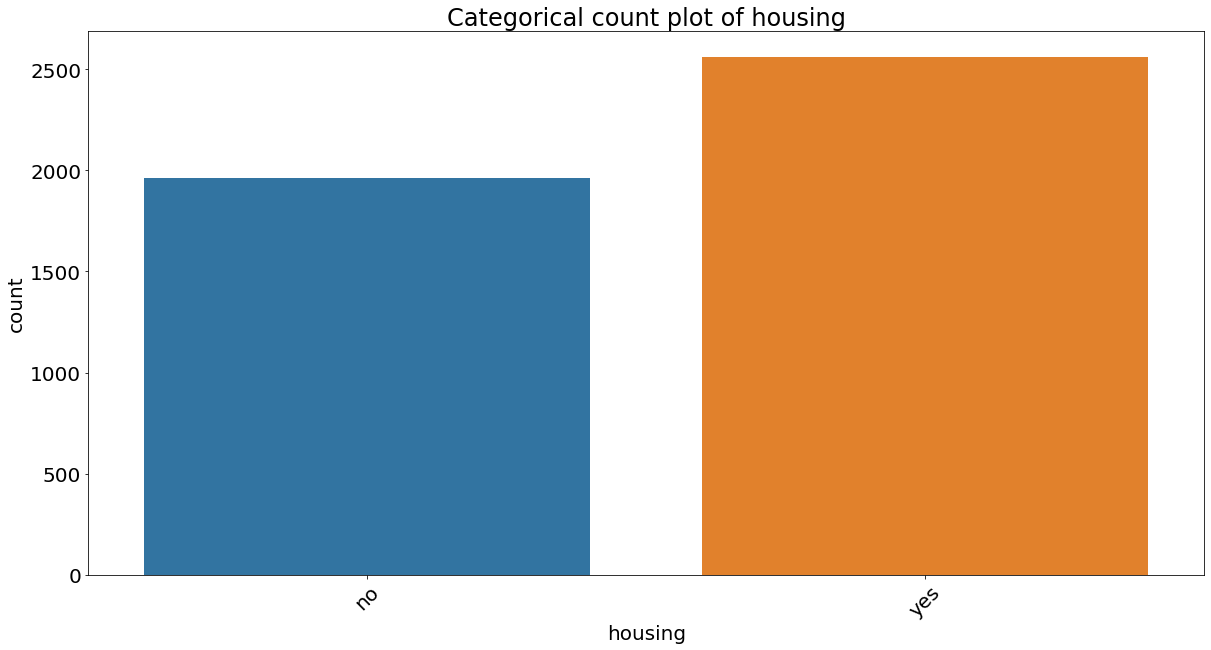

_______________________________
 ________________________________
no     3830
yes     691
Name: loan, dtype: int64




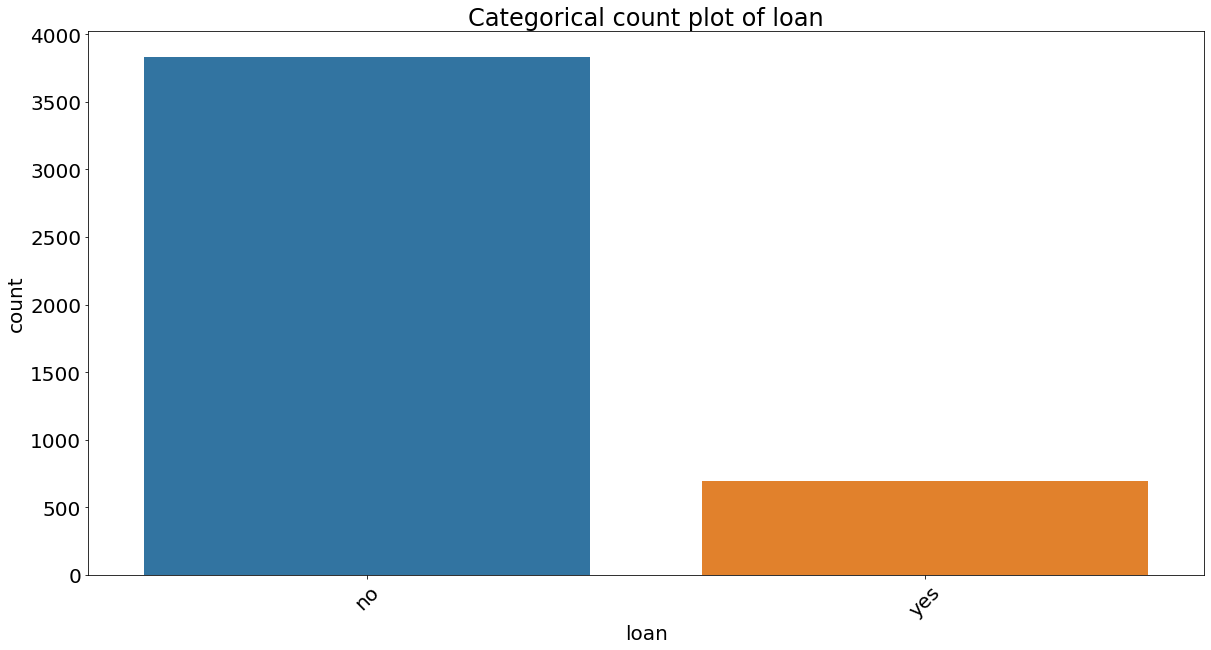

_______________________________
 ________________________________
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64




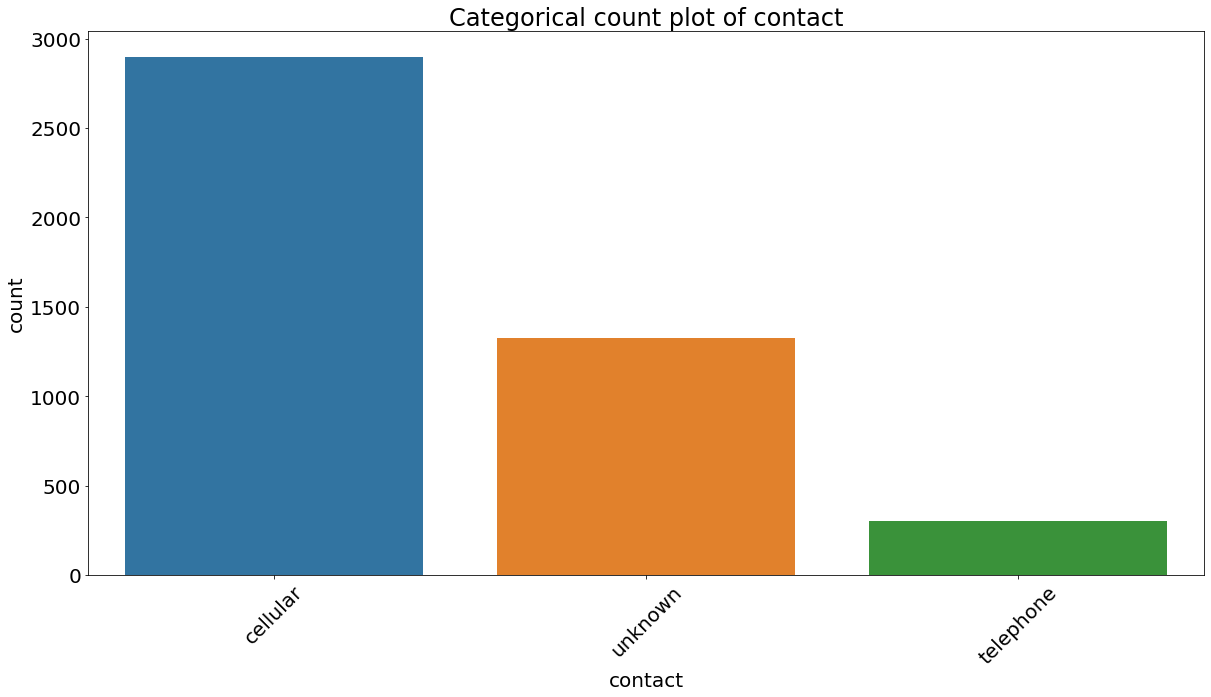

_______________________________
 ________________________________
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64




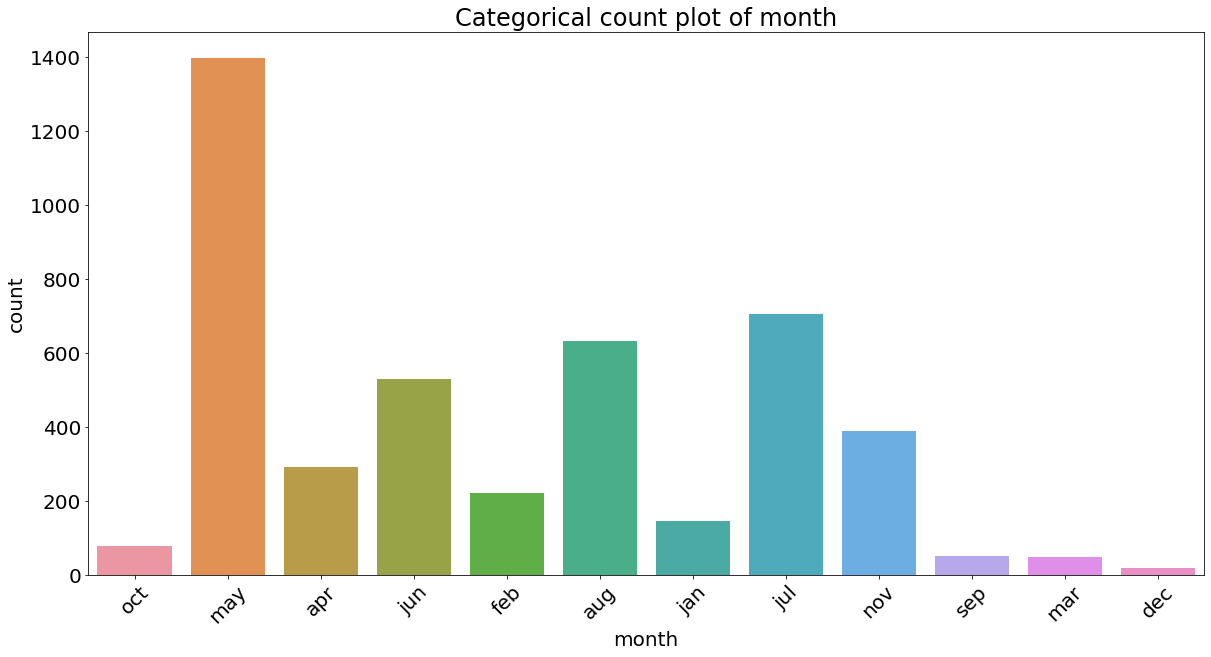

_______________________________
 ________________________________
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64




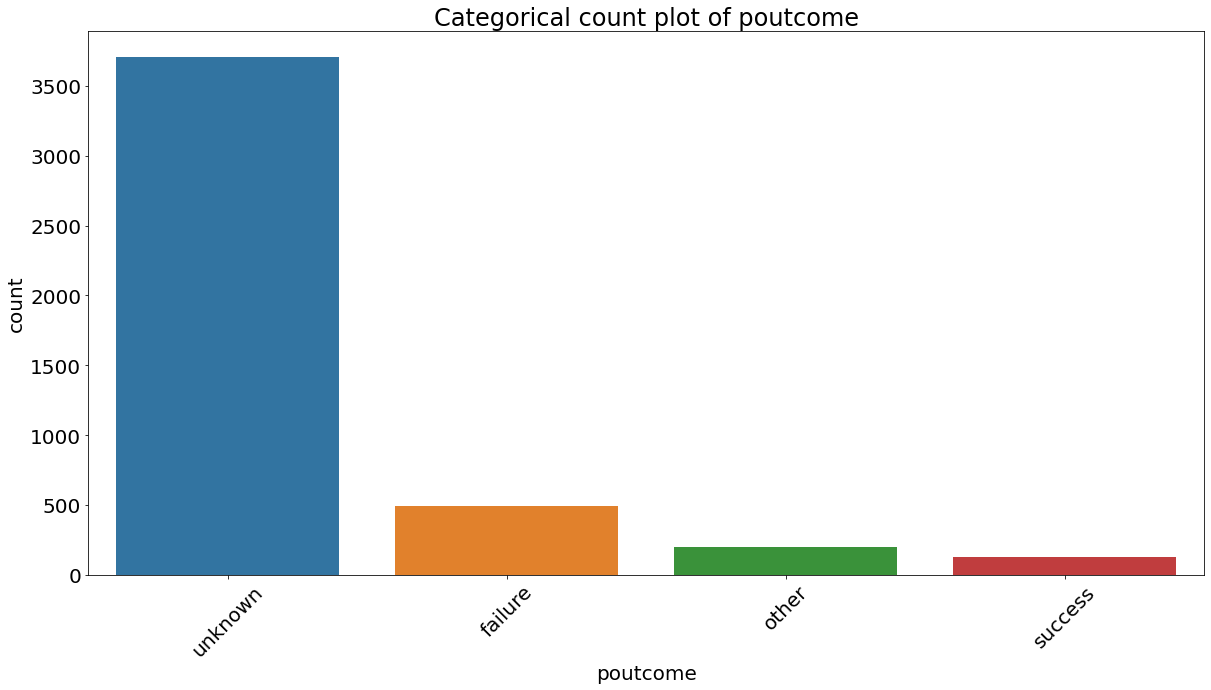

_______________________________
 ________________________________
no     4000
yes     521
Name: y, dtype: int64




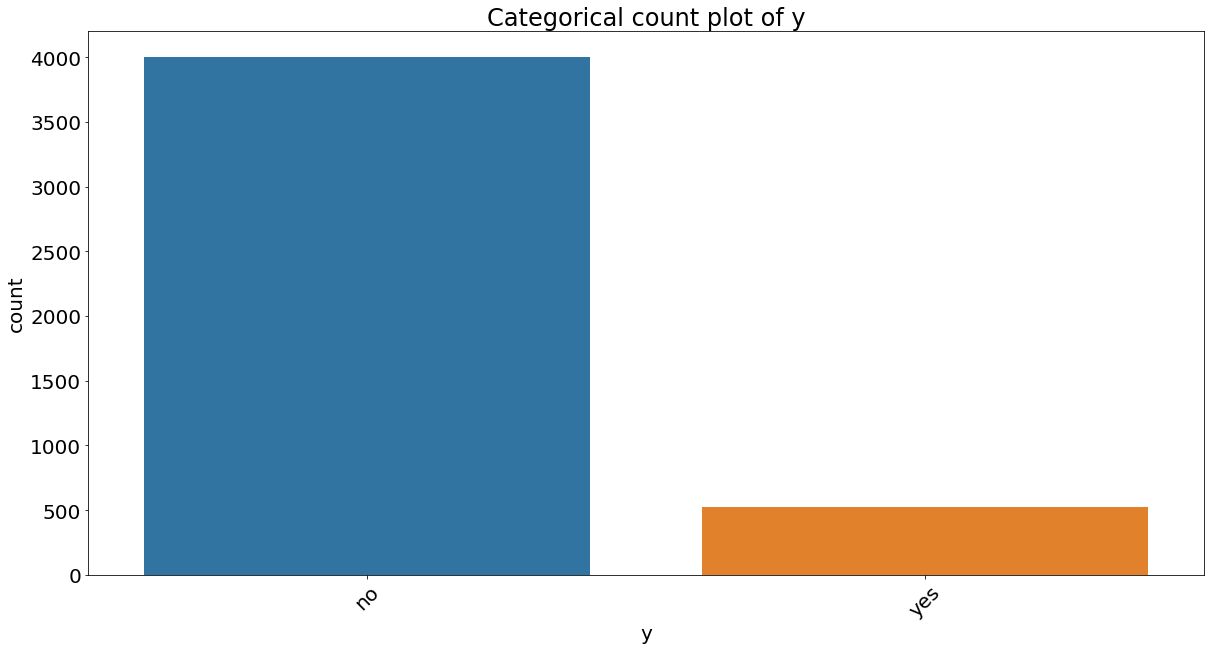

_______________________________
 ________________________________


In [14]:
for feature in cat_features: 
    
    
    fig = plt.subplots(figsize=(20, 10))
    
    plt.rcParams.update({'font.size': 20})
    
    data = bank_data[feature].value_counts()
    
    print(data)
    
    print("\n")
    
    countplot = sns.countplot(x=feature, data=bank_data)
    
    plt.title( 'Categorical count plot of '+feature)
    
    plt.xticks(rotation=45)
    
    plt.show()
    
    print("_______________________________")
    print(" ________________________________")

The Pie Chart Of Each Catagorical Feature

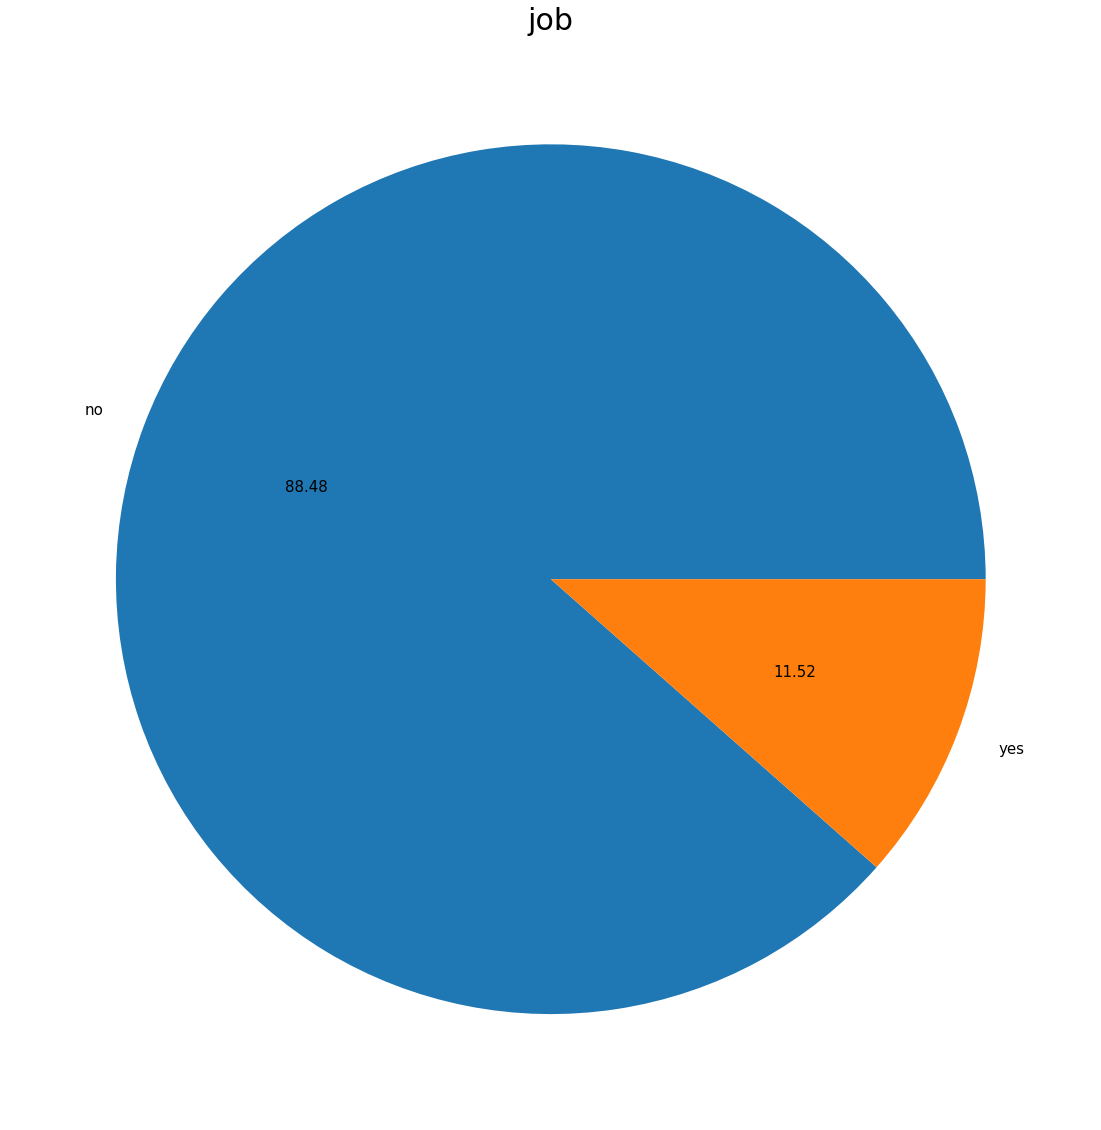

_______________________________________________________________________________________________________


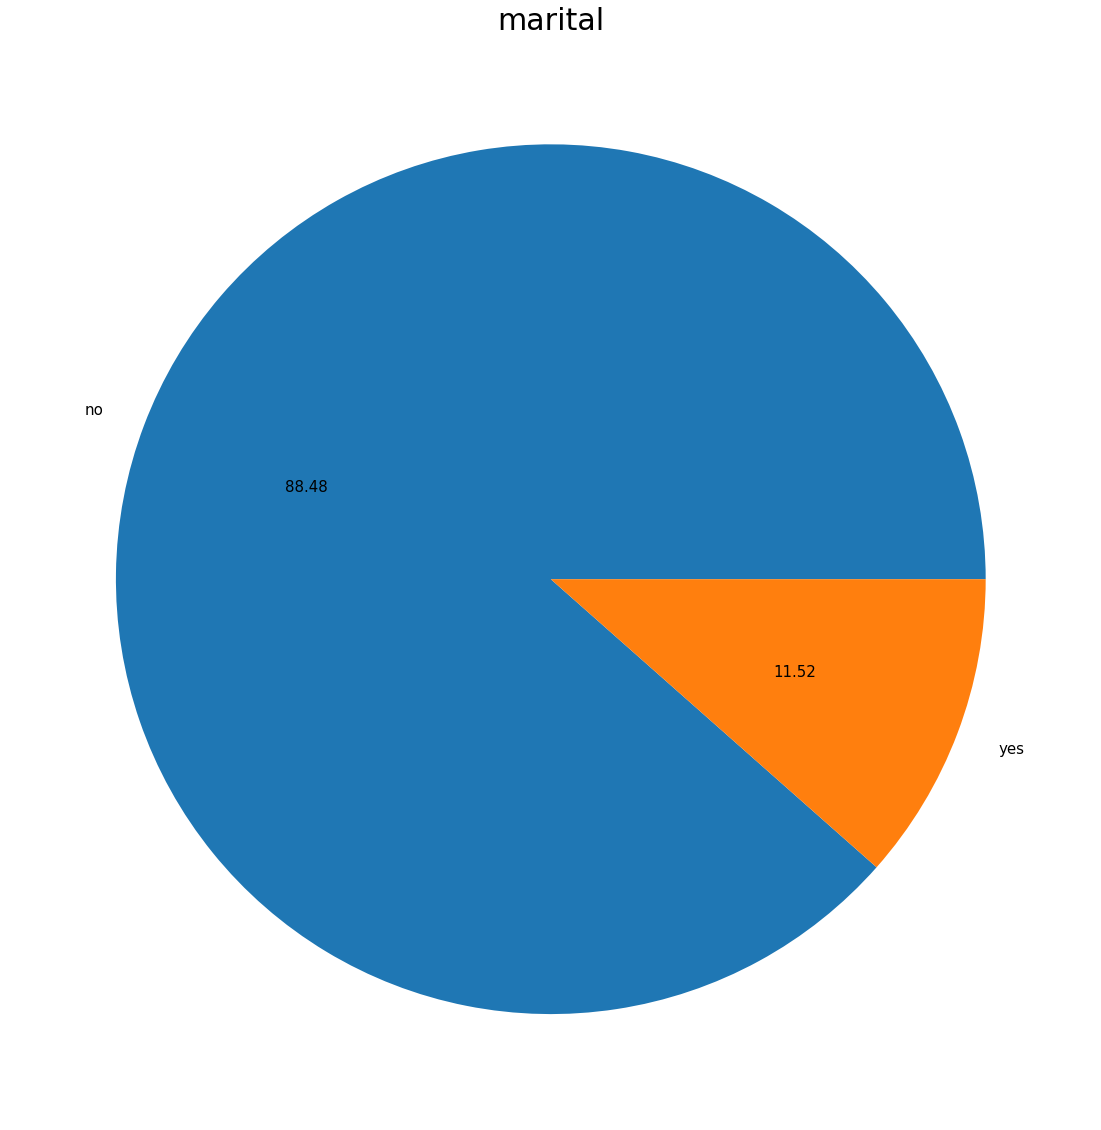

_______________________________________________________________________________________________________


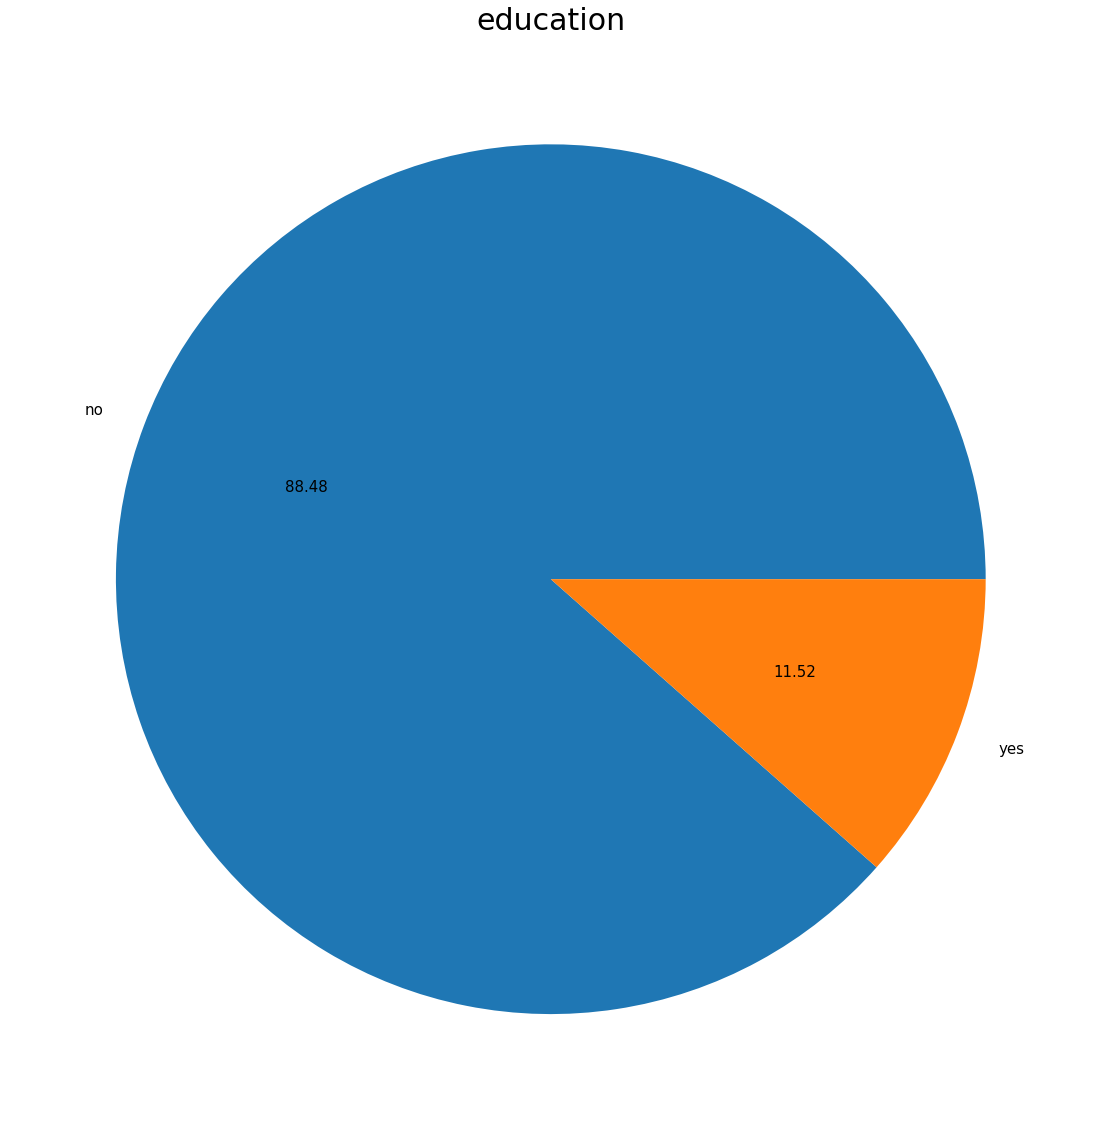

_______________________________________________________________________________________________________


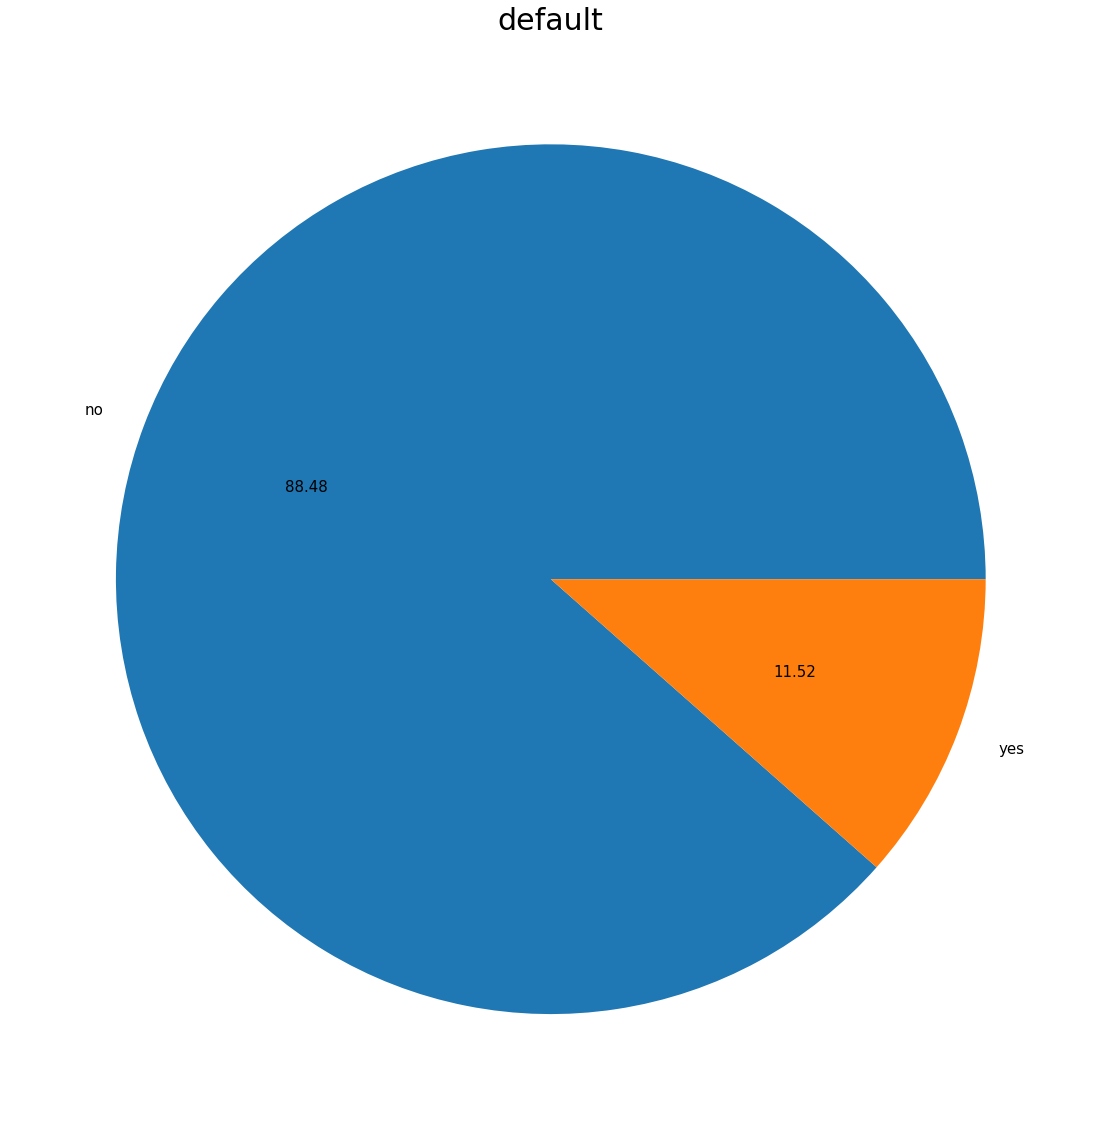

_______________________________________________________________________________________________________


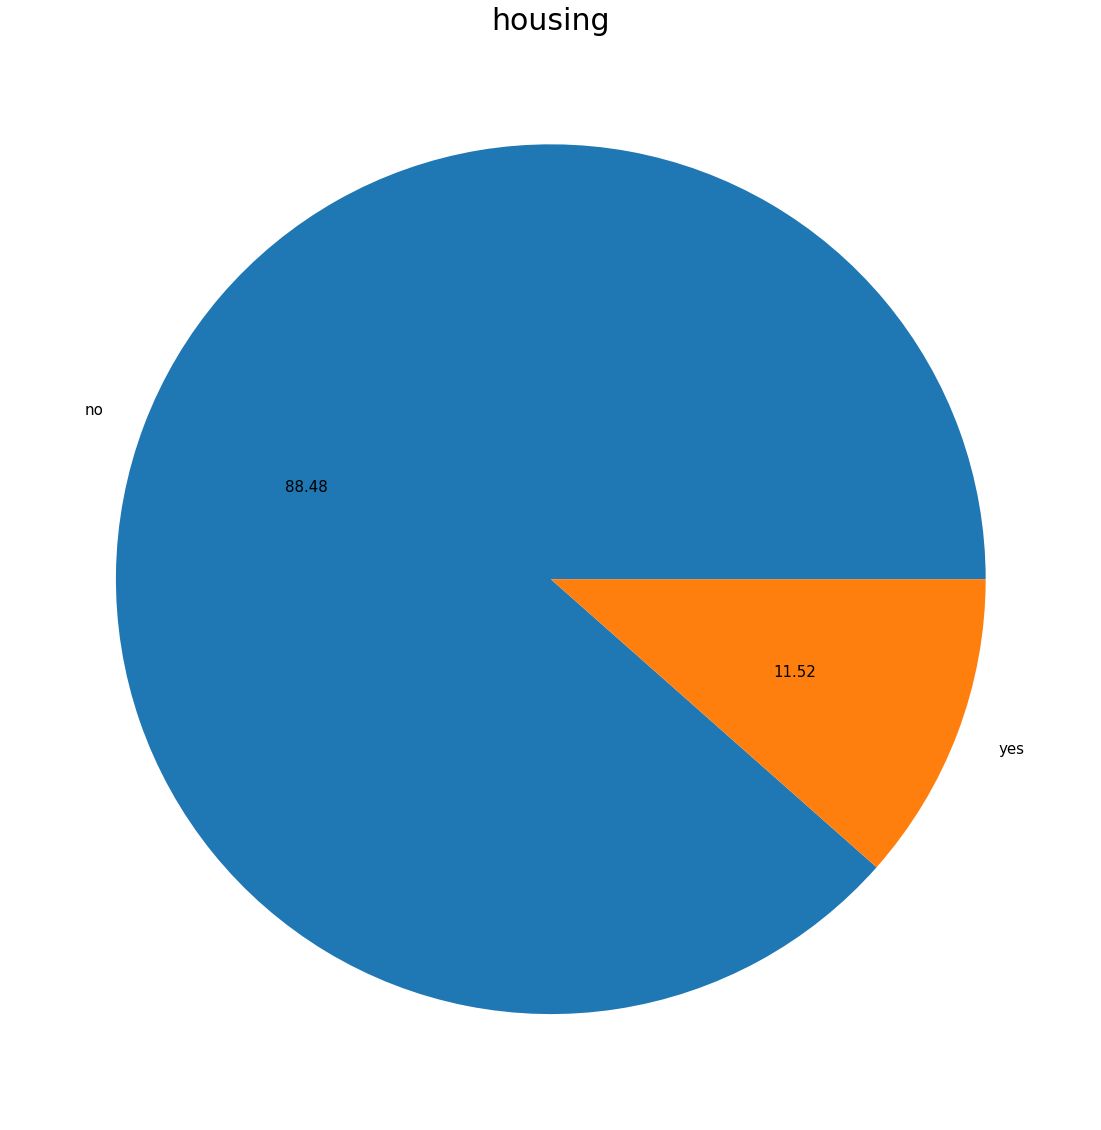

_______________________________________________________________________________________________________


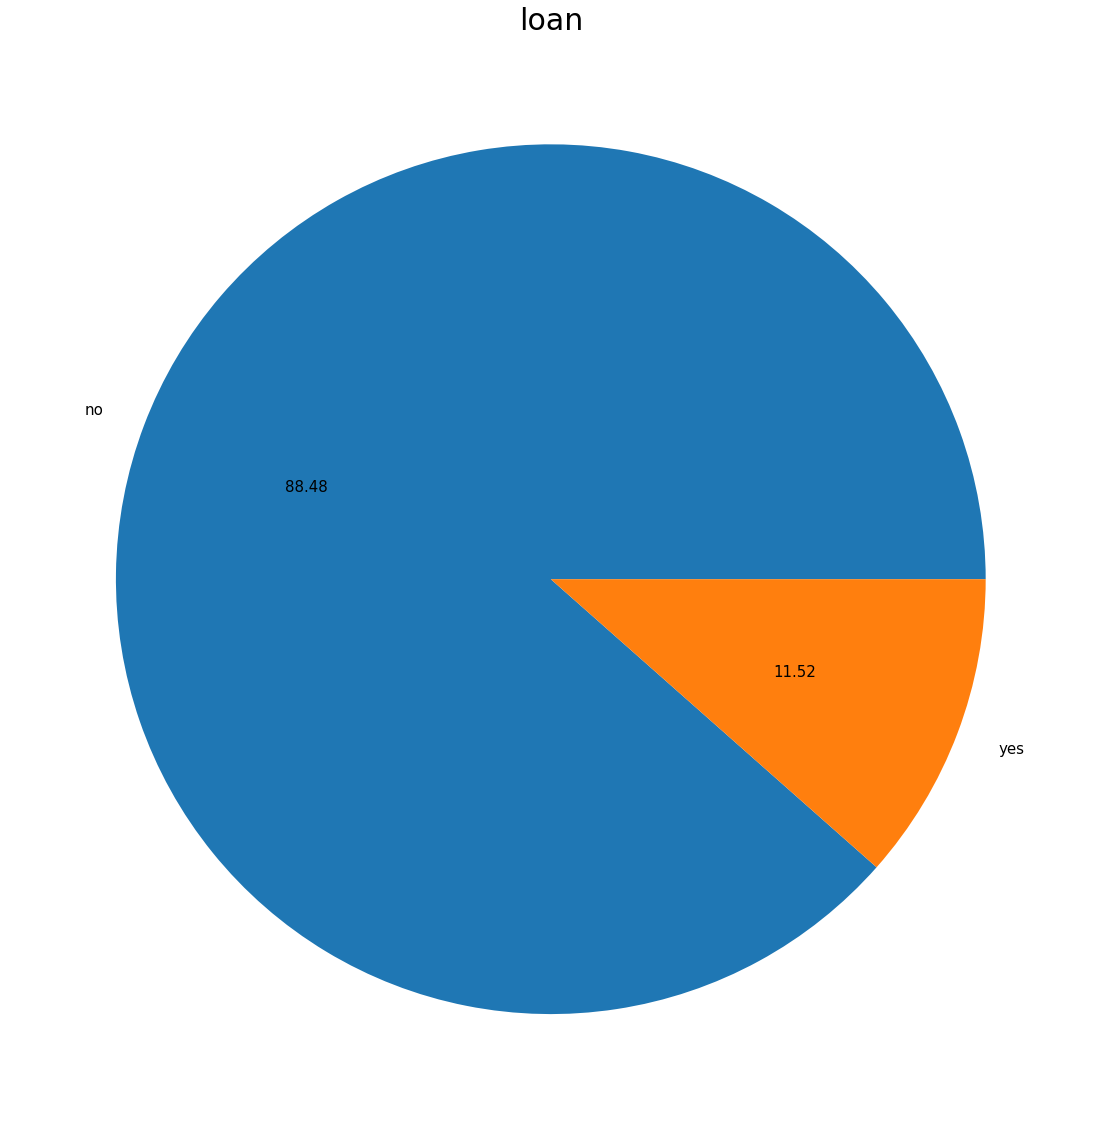

_______________________________________________________________________________________________________


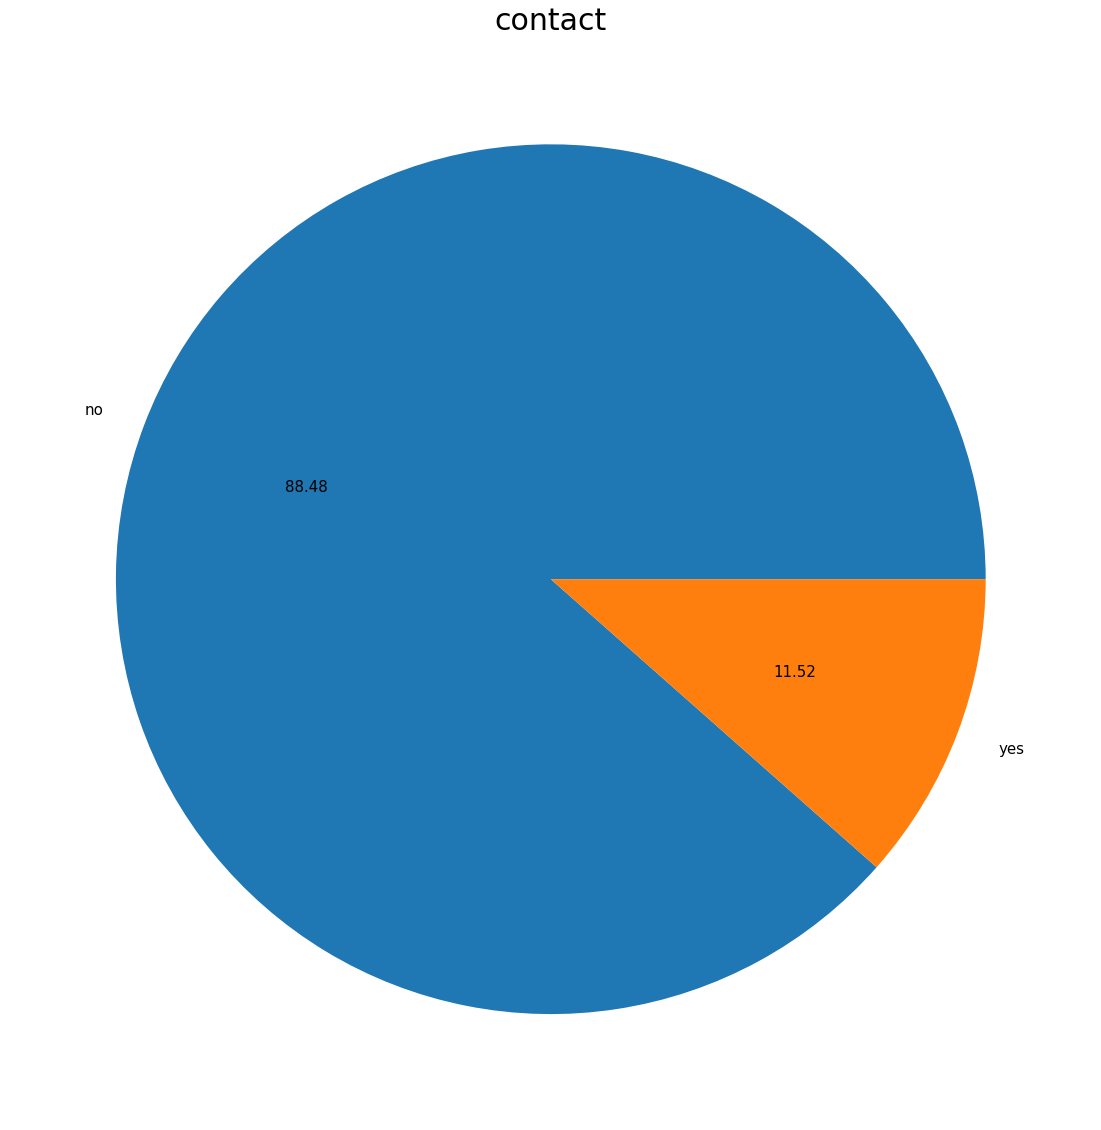

_______________________________________________________________________________________________________


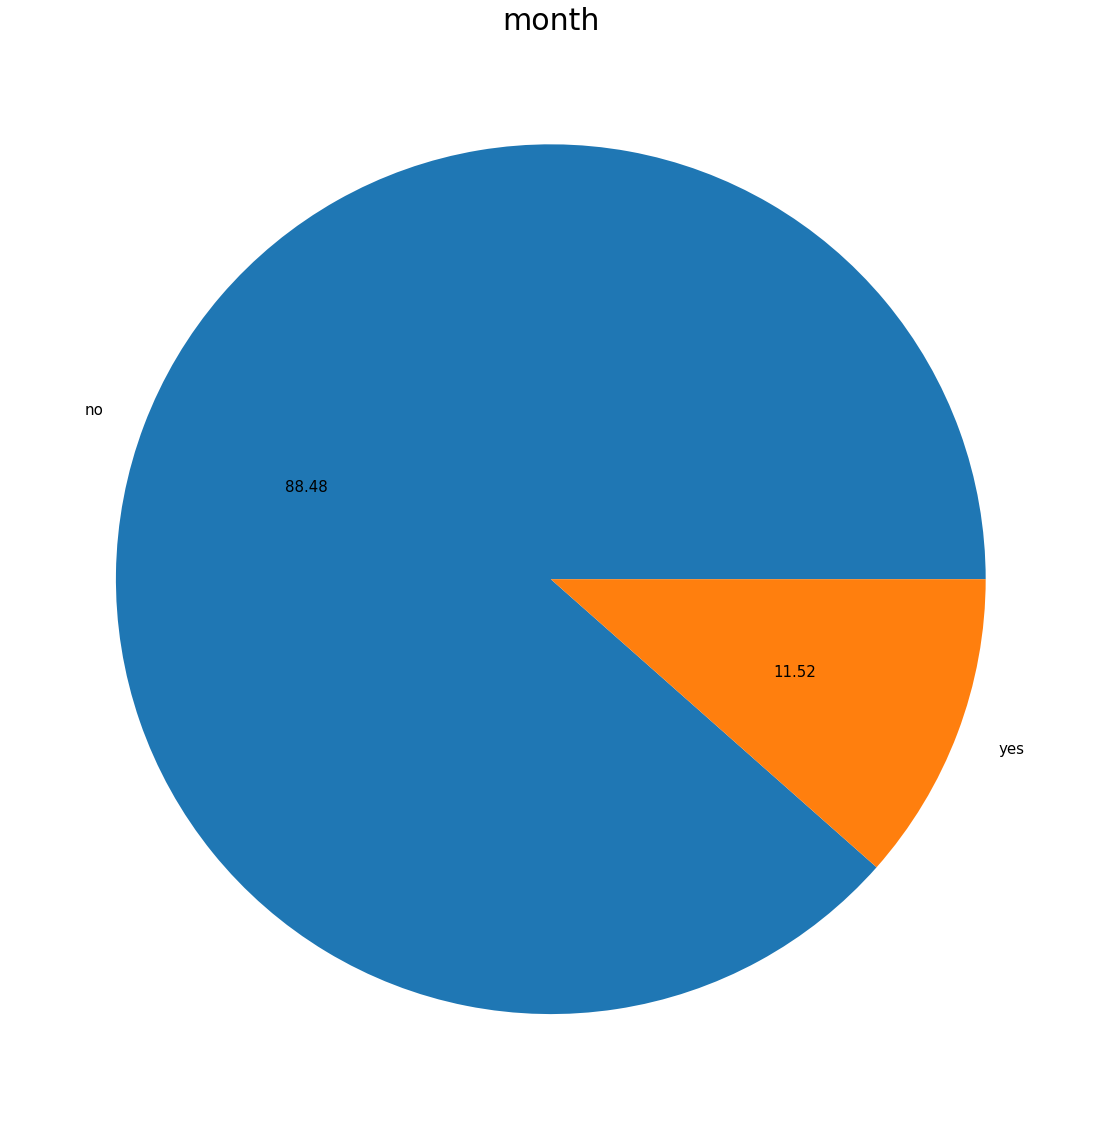

_______________________________________________________________________________________________________


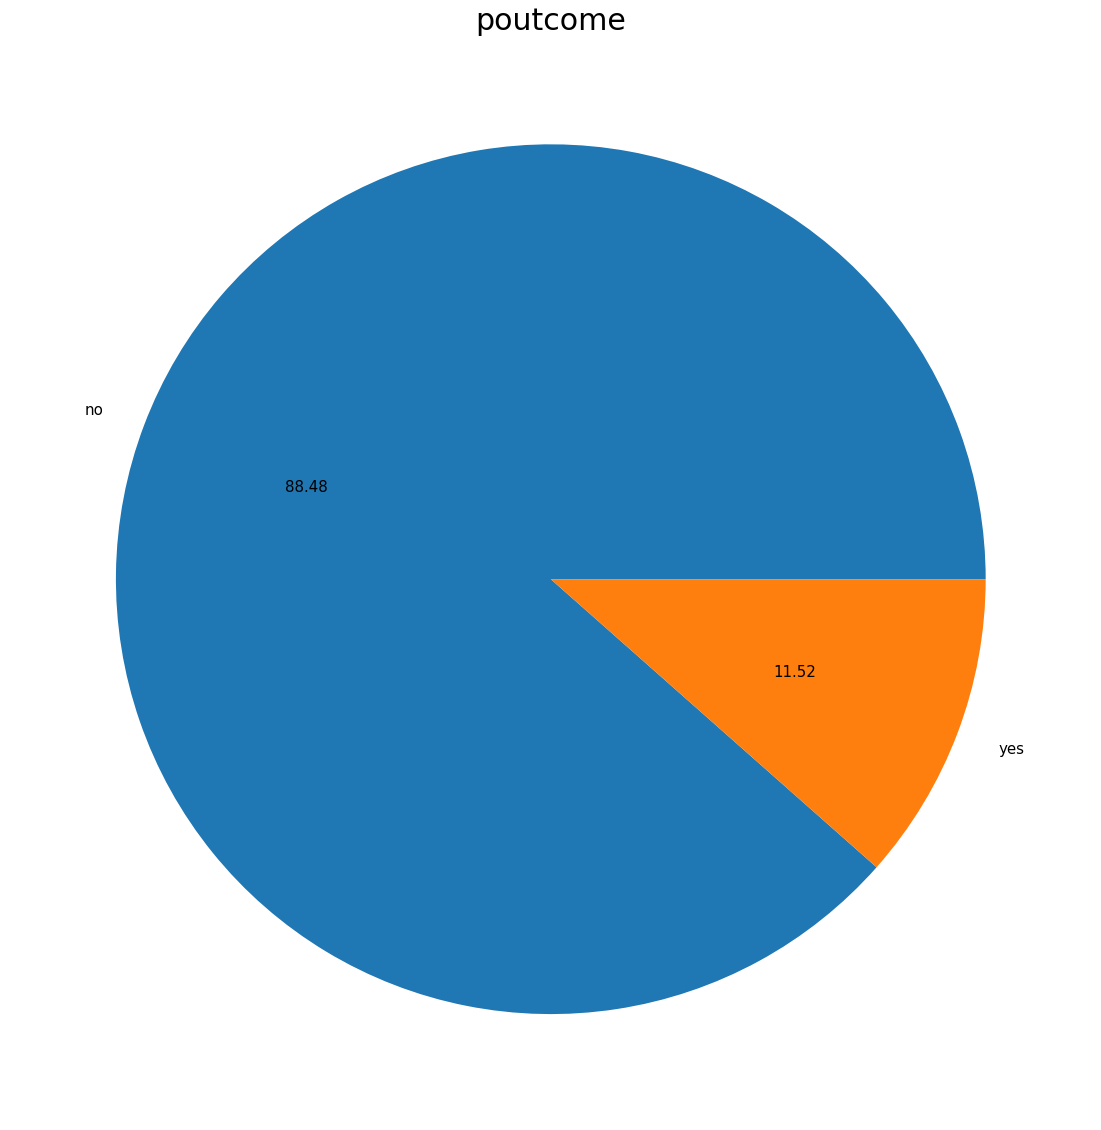

_______________________________________________________________________________________________________


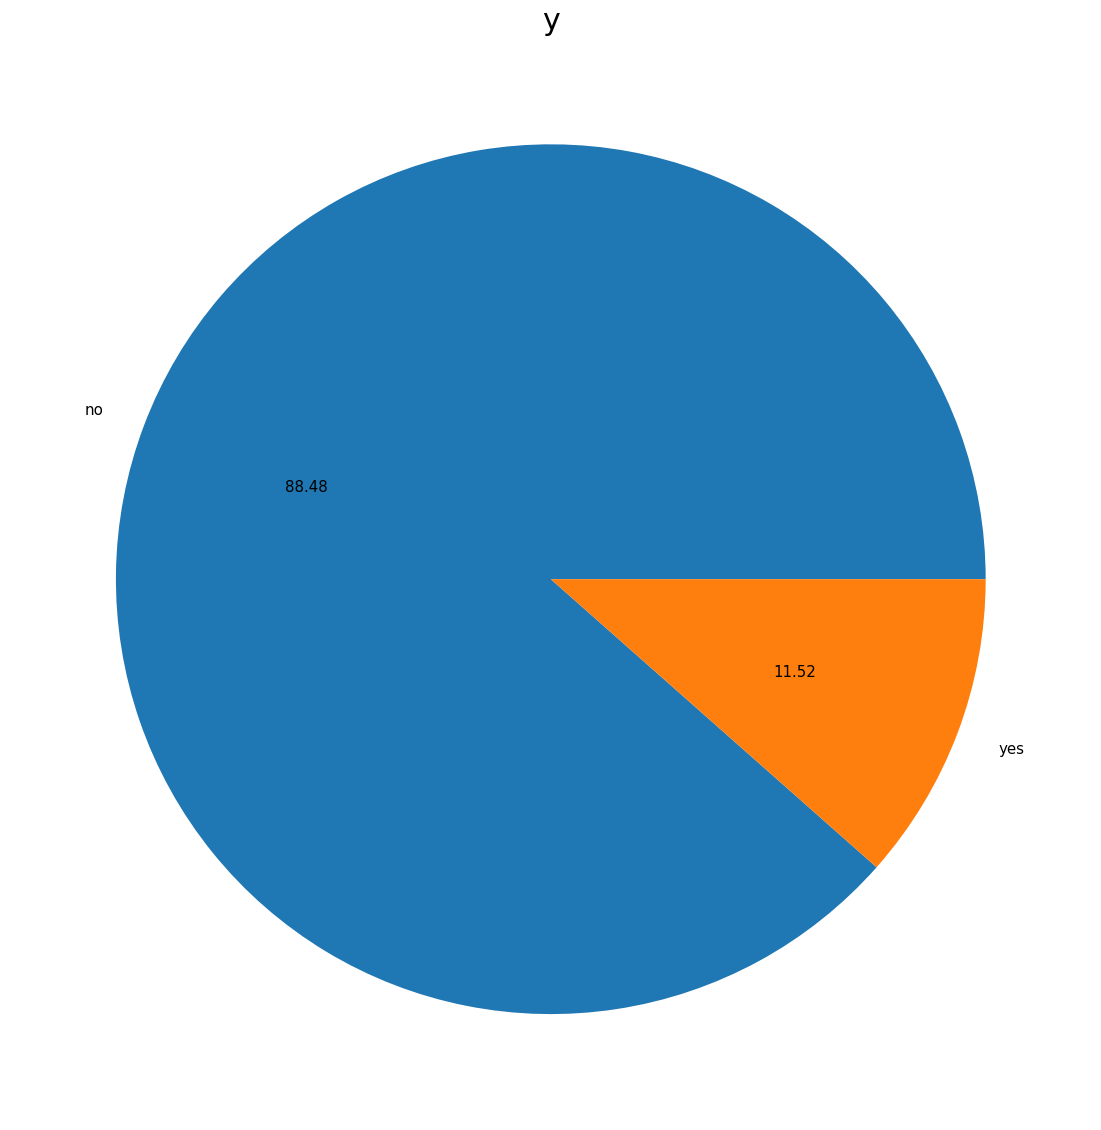

_______________________________________________________________________________________________________


In [15]:
for feature in cat_features: 
    
    fig = plt.subplots(figsize=(30, 20))
    
    plt.rcParams.update({'font.size': 25})
    
    
    
    
    
    pieplot = data.plot(kind='pie',  title=feature, autopct="%.2f", fontsize=15, ylabel='')
    
    plt.show()
    print("___________________________________________________"
          "____________________________________________________")

##### NUMERICAL VALUES

In [16]:
numeric = bank_data.select_dtypes(include=np.number)

numeric_columns= numeric.columns

numeric_features = list(numeric_columns) 

print(numeric_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


The Histograms And KDE Curves Of All The Numerical Features To Show Their PDFs


/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abey/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

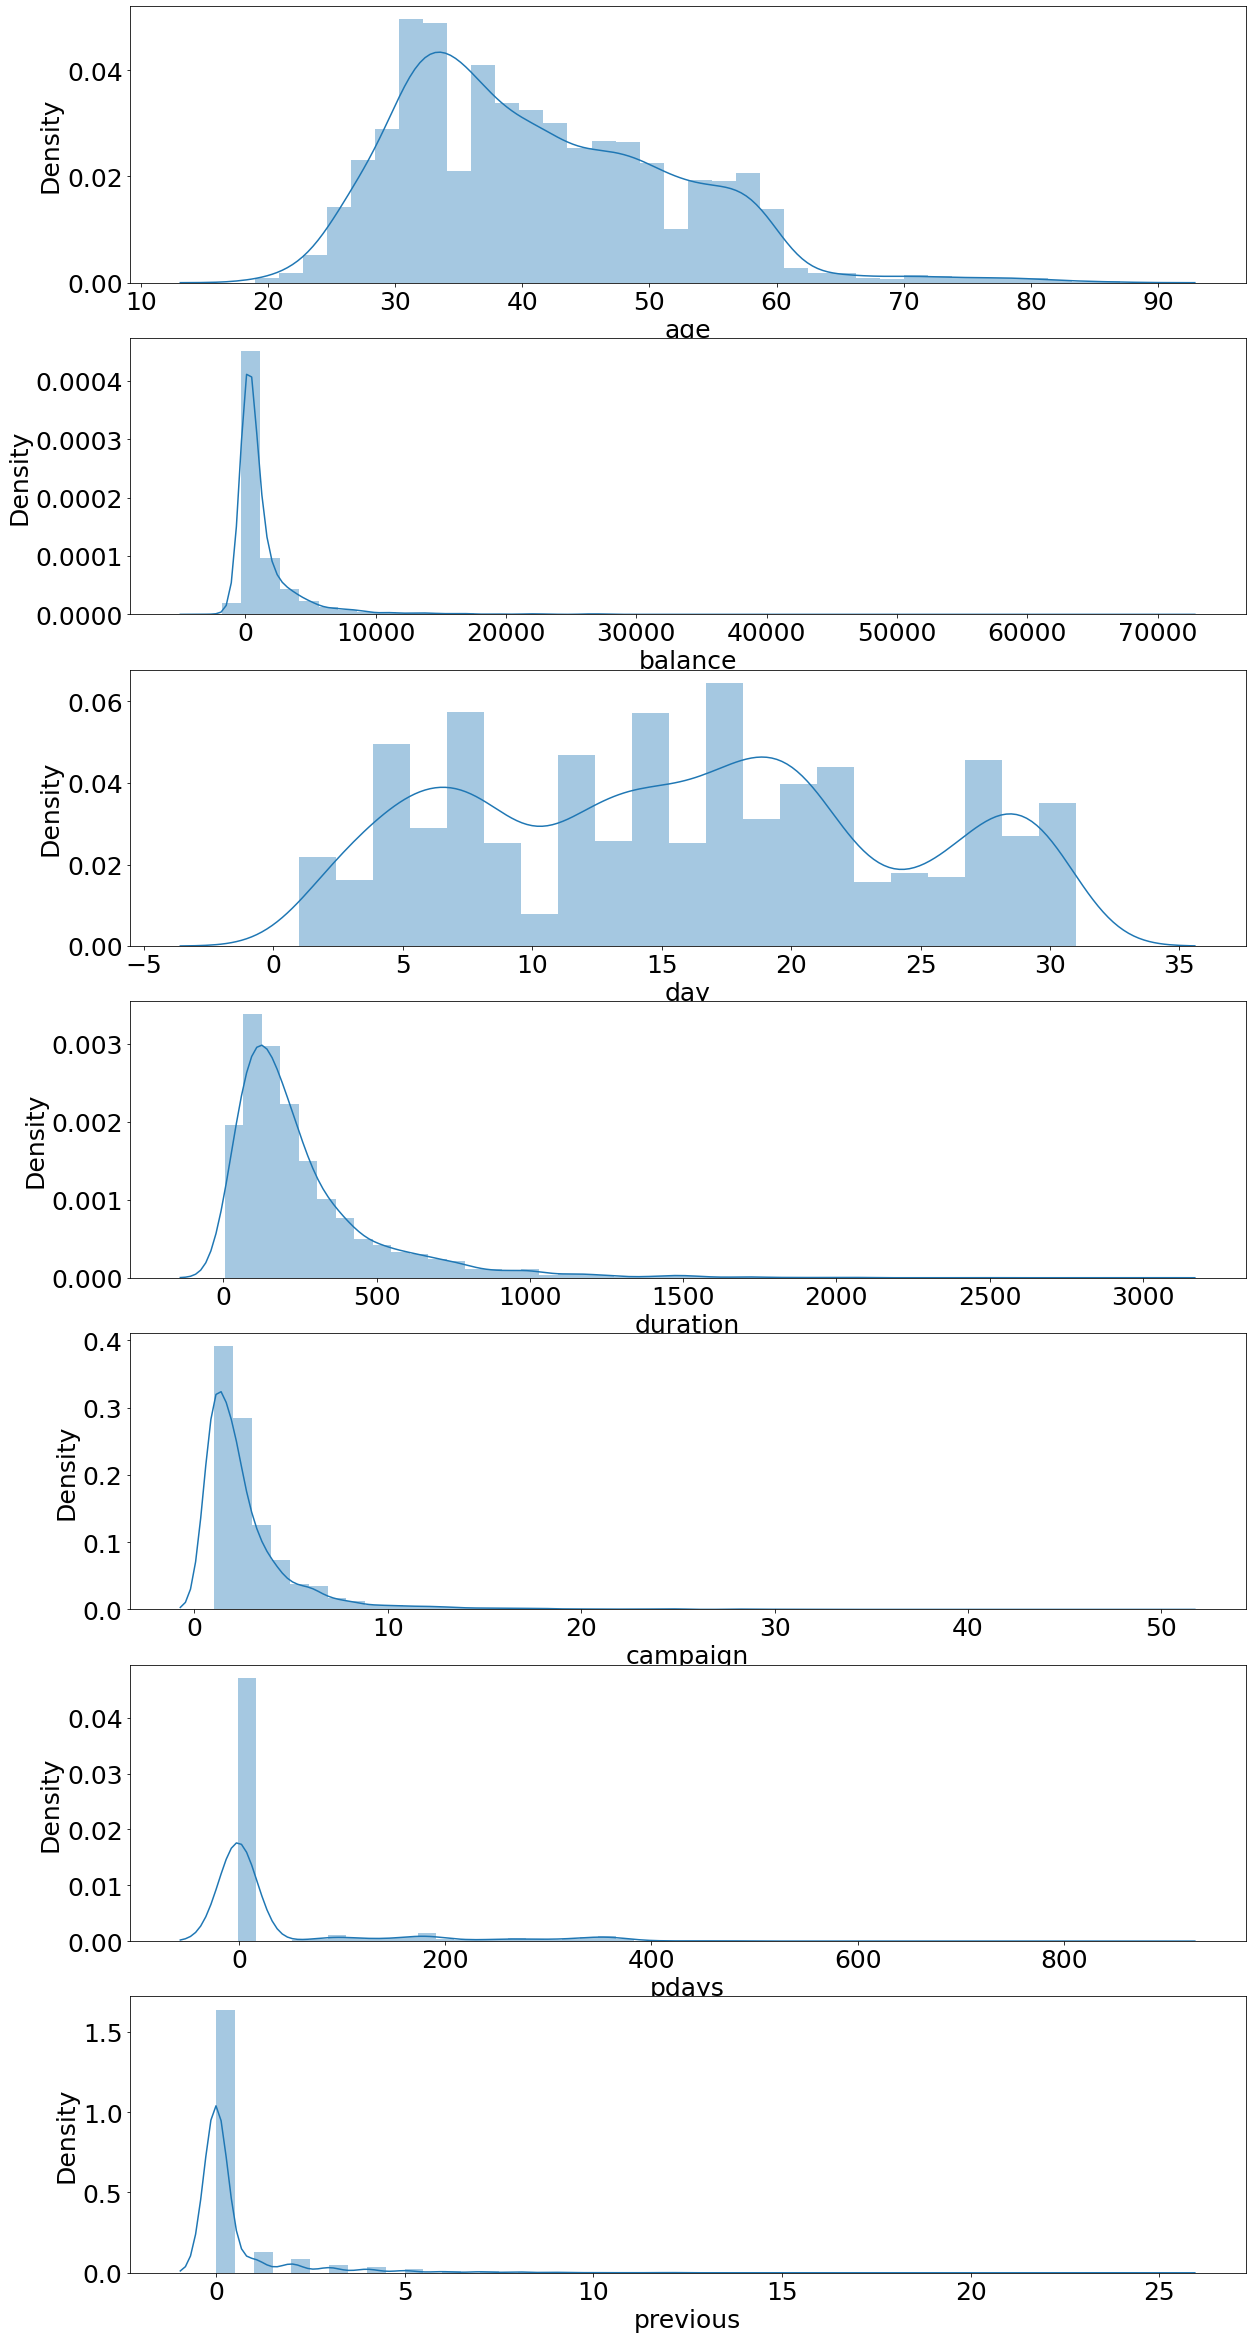

In [17]:
# plot of the histograms and KDE curves of the numerical features

plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(20,60), facecolor='white')

plotnumber =1


for num_features in numeric_features:
    
    ax = plt.subplot(10,1,plotnumber)
    
    sns.distplot(bank_data[num_features])
    
    plt.xlabel(num_features)
    
    plotnumber+=1
    
    
plt.show()

##### Histogram

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

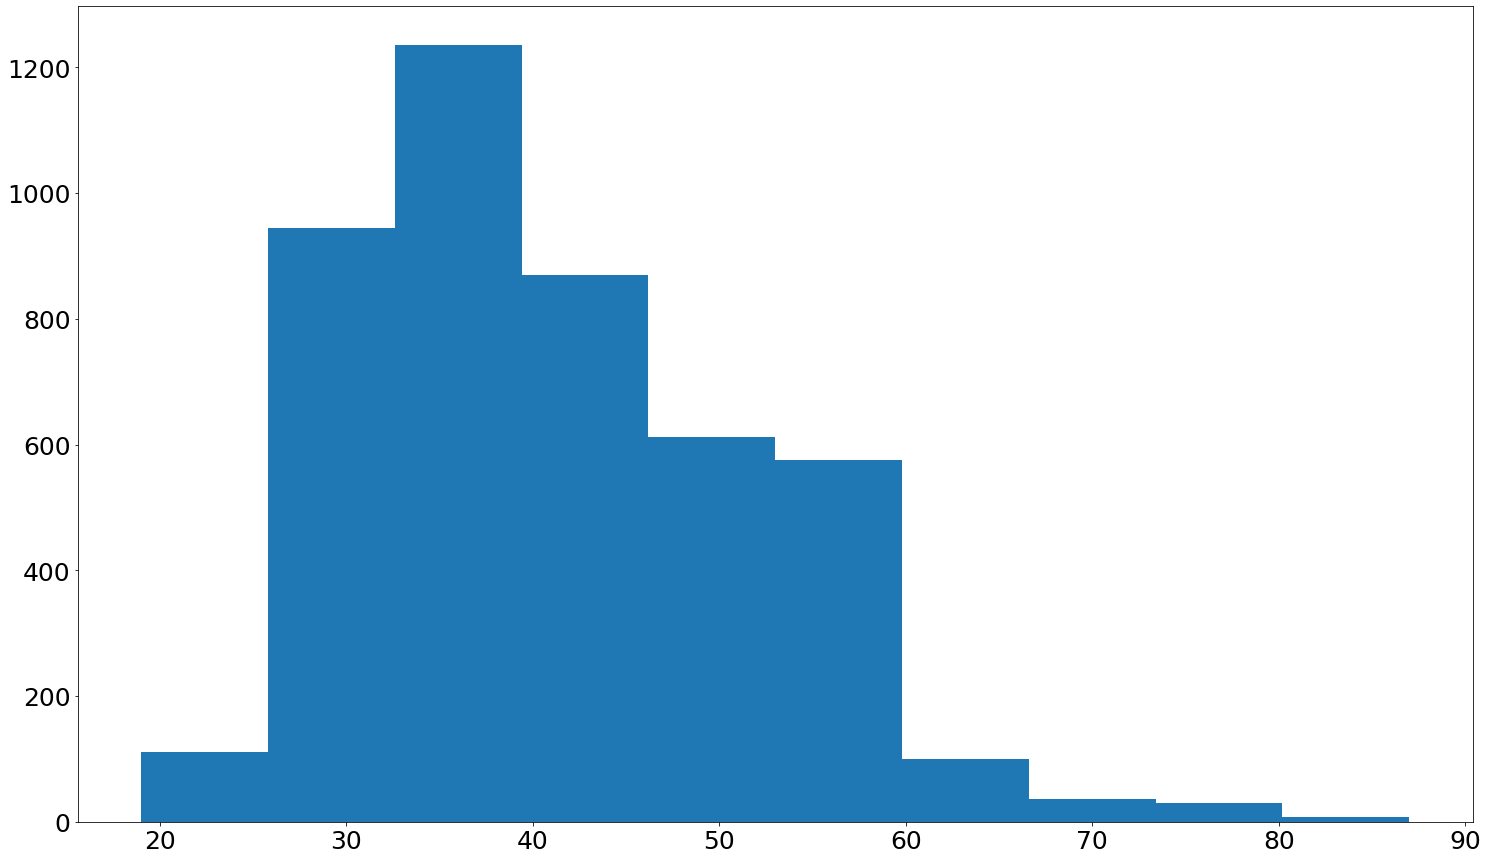

In [18]:
# histogram of feature age

plt.figure(figsize=(25,15))

plt.hist(x=bank_data['age'])

(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <BarContainer object of 10 artists>)

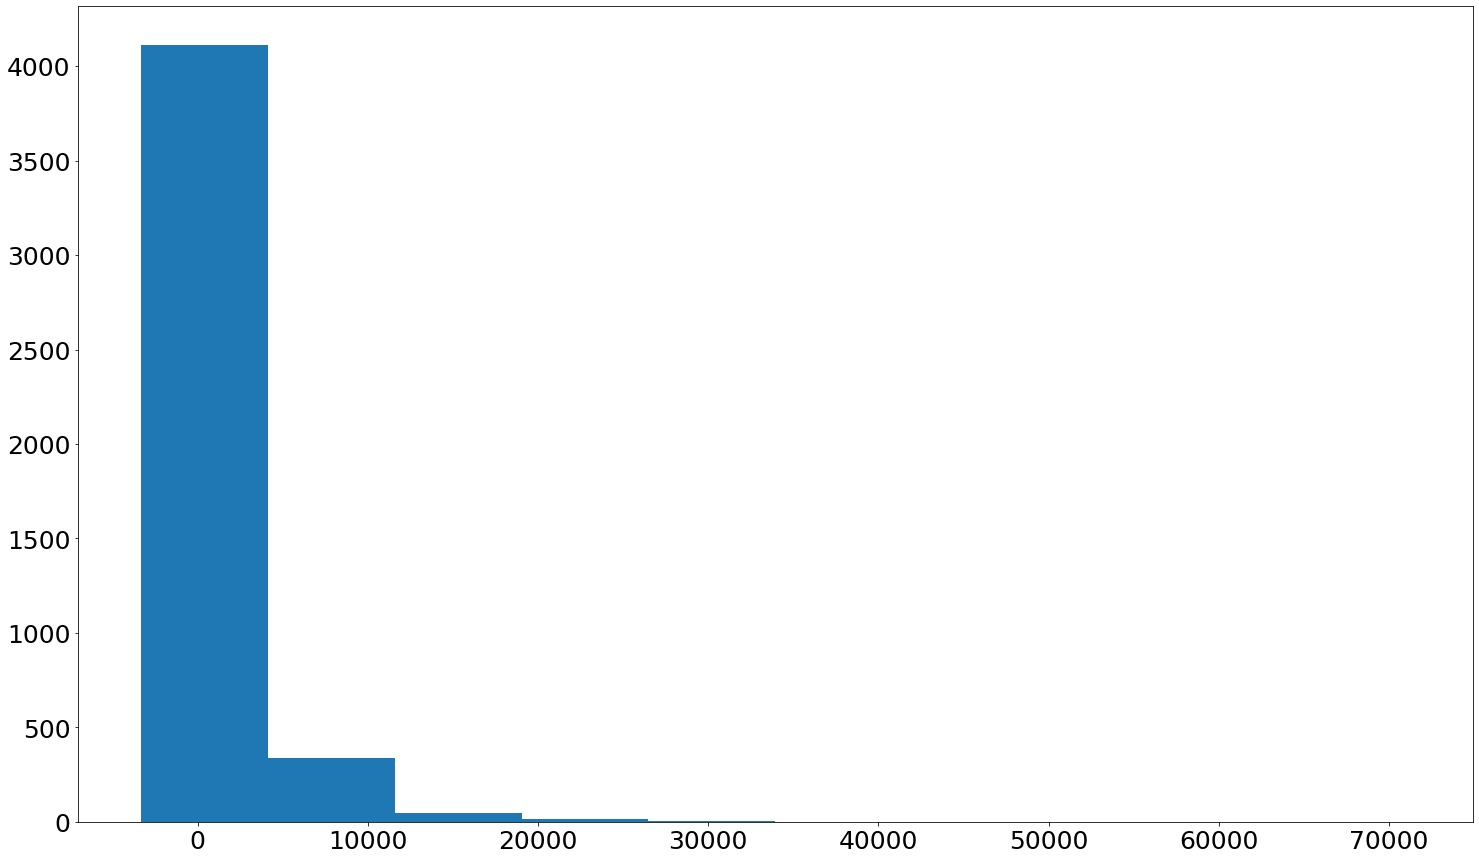

In [19]:
# histogram of feature balance

plt.figure(figsize=(25,15))

plt.hist(x=bank_data['balance'])

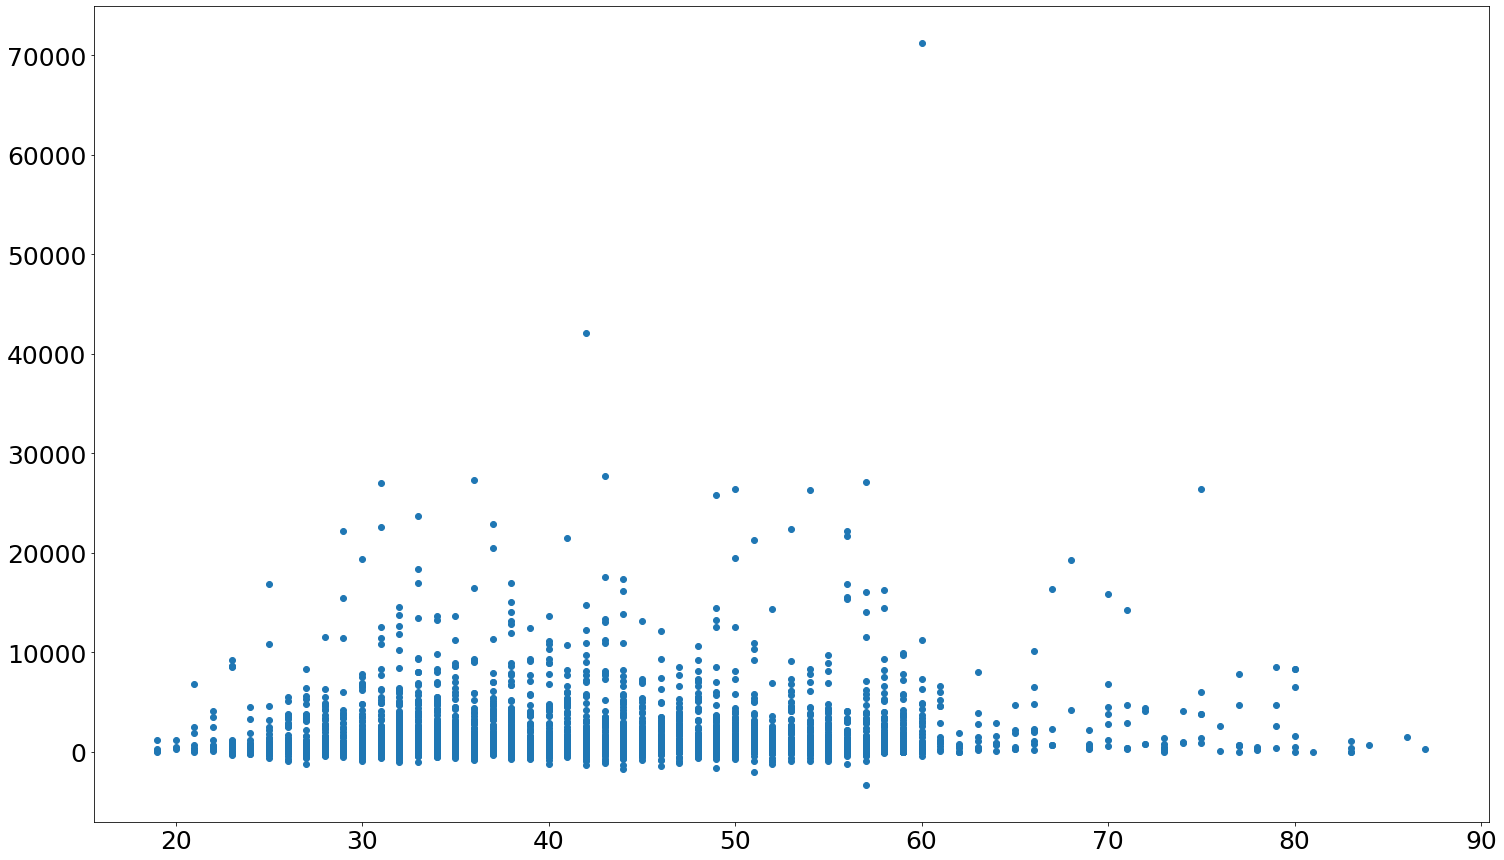

In [20]:
# scatter plot of balance and age 


plt.figure(figsize=(25,15))

plt.scatter(x='age',y='balance',data=bank_data)